## Esercizio 1 – regressione lineare

Si considerino i seguenti dati campionari raccolti per stimare il tempo che impiega un computer a processare dati:  
$x$ è il numero di dati e $y$ il tempo, in secondi, impiegato per processarli.

| $x$ | 211 | 332 | 322 | 435 | 275 |
|-----|-----|-----|-----|-----|-----|
| $y$ | 112 | 155 | 131 | 208 | 138 |

1. Si calcoli il coefficiente di correlazione tra le variabili $x$ e $y$;
2. Usare il metodo dei minimi quadrati per determinare la retta di regressione. Fare un plot dei dati e della retta di regressione;
3. Si calcoli il tempo previsto per processare $200$, $300$, $400$, $500$ dati.


In [46]:
import numpy as np

def covariance(X,Y):
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    cov = 0
    for i in range(len(X)):
        cov += (X[i] - X_mean)*(Y[i] - Y_mean)
    
    return cov/len(X)

def var(X):
    return covariance(X,X)

X = [211,332,322,435,275]
Y = [112,155,131,208,138]

corr = covariance(X,Y)/np.sqrt(var(X)*var(Y))
print(f"La correlazione è forte! {corr}")


La correlazione è forte! 0.9428728197430174


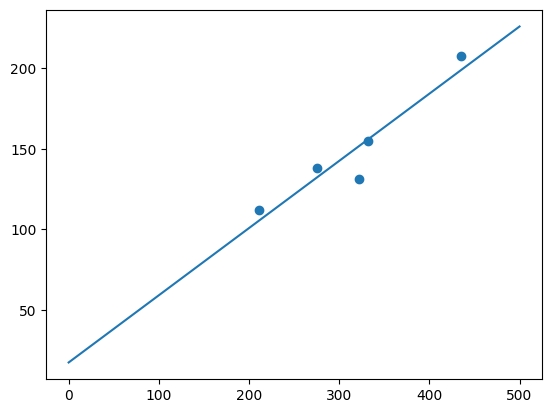

In [93]:
import matplotlib.pyplot as plt

b0 = np.mean(Y) - np.mean(X) * (covariance(X,Y)/var(X))
b1 = covariance(X,Y)/var(X)

def regression(x):
    ret = b0 + b1*x
    return ret

x_reg = np.linspace(0, 500, 30)
y_reg = regression(x_reg)

plt.plot(x_reg, regression(x_reg))
plt.scatter(X,Y)
plt.show()

In [95]:
X = [200,300,400,500]

for x in X:
    print(f"Il tempo richiesto per processare {x} è: {regression(x)}")

Il tempo richiesto per processare 200 è: 100.756986079399
Il tempo richiesto per processare 300 è: 142.53351992339987
Il tempo richiesto per processare 400 è: 184.31005376740077
Il tempo richiesto per processare 500 è: 226.08658761140165


## Esercizio 2 – regressione lineare

I seguenti dati di deformazione lineare $(\varepsilon_y)$ e longitudinale $(\varepsilon_x)$ sono stati ottenuti sottoponendo a sforzo delle sbarre fabbricate con una lega sperimentale:

| $\varepsilon_x$ | 0.3 | 0.4 | 0.2 | 0.5 | 0.6 |
|-----------------|-----|-----|-----|-----|-----|
| $\varepsilon_y$ | 0.11 | 0.14 | 0.06 | 0.16 | 0.22 |

1. Si calcoli il coefficiente di correlazione tra le variabili $\varepsilon_x$ e $\varepsilon_y$;
2. È ragionevole supporre che ci sia una relazione lineare tra le due quantità? Giustificare la risposta;
3. Usare il metodo dei minimi quadrati per determinare la retta di regressione. Fare un plot dei dati e della retta di regressione;
4. Usare la retta di regressione trovata per predire la deformazione laterale corrispondente a una deformazione longitudinale pari a $\varepsilon_x = 0.35$ e a $\varepsilon_x = 0.8$. Quale delle due previsioni ritenete più affidabile? Perché?


## Esercizio 3 – intervalli di confidenza

Dato il campione, proveniente da una distribuzione normale $N(\mu,\sigma^2)$:
$$
\{0.39,0.68,0.82,1.35,1.38,1.62,1.70,1.71,1.85,2.14,2.89,3.69\}.
$$

1. Calcolare $\bar{X}_n$, $\hat{\sigma}_n$, skewness e curtosi. Sono coerenti con i valori di una distribuzione normale?
2. Stimare i valori dei parametri $\mu$ e $\sigma$ in base al campione;
3. Calcolare degli intervalli di confidenza al livello del $95\%$


In [123]:
from scipy.stats import skew, kurtosis

X = [0.39,0.68,0.82,1.35,1.38,1.62,1.70,1.71,1.85,2.14,2.89,3.69]

def var(X):
    return np.sum((X-np.mean(X))**2)/(len(X))

def var_estimator(X):
    return np.sum((X-np.mean(X))**2)/(len(X)-1)

print("\n1.")
print(f"la media campionaria è: {np.mean(X)}")
print(f"la varianza campionaria è: {var(X)} (ma è uno stimatore distorto)")
print(f"lo stimatore non distorto della varianza è: {var_estimator(X)}")
print(f"skewness: {skew(X)}")
print(f"curtòsi: {kurtosis(X, fisher=False)}")

print("\n2.")
print(f"la media stimata è: {np.mean(X)}")
print(f"la varianza stimata è: {var_estimator(X)}")


1.
la media campionaria è: 1.6850000000000003
la varianza campionaria è: 0.779325 (ma è uno stimatore distorto)
lo stimatore non distorto della varianza è: 0.8501727272727273
skewness: 0.7277632779844692
curtòsi: 3.118238214525985

2.
la media stimata è: 1.6850000000000003
la varianza stimata è: 0.8501727272727273


In [ ]:
# intervallo di confidenza per media

from scipy.stats import t

alpha = 0.05
n = len(X)

t = t.ppf(1 - alpha/2, n-1)
mean = np.mean(X)

I0 = mean - np.sqrt(var_estimator(X)/n)*t
I1 = mean + np.sqrt(var_estimator(X)/n)*t
print(f"[{I0}, {I1}]")

[1.0991585771593577, 2.270841422840643]


In [138]:
# intervallo di confidenza per media

from scipy.stats import chi2

alpha = 0.05
n = len(X)

chi_left = chi2.ppf(1 - alpha/2, n-1)
chi_right = chi2.ppf(alpha/2, n-1)

mean = np.mean(X)

I0 = var_estimator(X)*(n-1)/chi_left
I1 = var_estimator(X)*(n-1)/chi_right
print(f"[{I0}, {I1}]")

[0.42663681493771966, 2.450869235023462]
